In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('1.csv')
#df.dtypes

In [22]:
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df['M0'], autolag='AIC') 

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -1.927008
p-value                          0.319464
#Lags Used                      12.000000
Number of Observations Used    164.000000
Critical Value (1%)             -3.470866
Critical Value (5%)             -2.879330
Critical Value (10%)            -2.576255
dtype: float64


In [5]:
df['Epoch_Time_of_Clock'] = pd.to_datetime(df['Epoch_Time_of_Clock'])
df.Timestamp = pd.to_datetime(df['Epoch_Time_of_Clock'],format='%Y-%m-%d %H:%M:%S') 
b=df['M0']
b.index = df.Timestamp
len(b)

/home/shreyas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


177

In [6]:
#split
train = b.iloc[0:137]
test = b.iloc[137:177]

/home/shreyas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


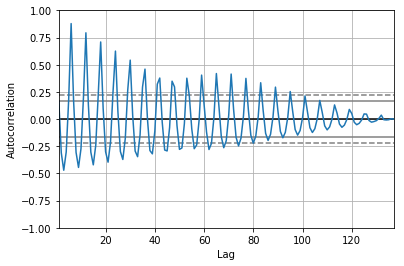

In [7]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(train)

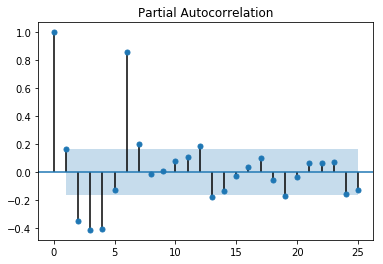

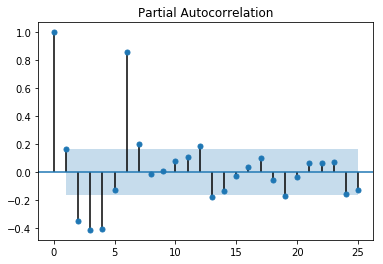

In [8]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(train,lags=25)

Epoch_Time_of_Clock
1970-01-01 00:02:51.101140         NaN
1970-01-01 00:02:51.101160   -5.233018
1970-01-01 00:02:51.101180    1.050242
1970-01-01 00:02:51.101200    1.050215
1970-01-01 00:02:51.101220    1.050133
1970-01-01 00:02:51.102000    1.050268
1970-01-01 00:02:51.102120    0.018081
1970-01-01 00:02:51.102140    1.050355
1970-01-01 00:02:51.102160   -5.233016
1970-01-01 00:02:51.102180    1.050193
Name: M0, dtype: float64


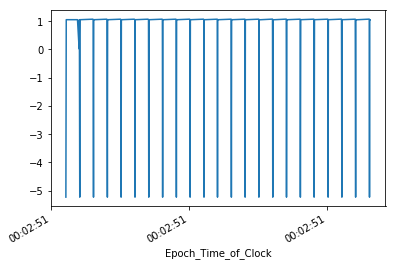

In [9]:
#d1 = np.log(train)
d1=train
#d1 = d1 - d1.shift(1)
#print(d1.head(10))
d1 = d1 - d1.shift(1)
#d1[0]=train[0]
print(d1.head(10))
#d1.head()
d1.dropna().plot()
#len(d1)
#plt.plot(train)


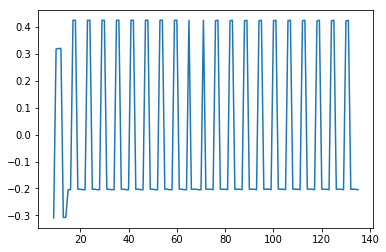

In [19]:
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff
dif = difference(train , 1)
ss = pd.Series(dif, copy=True)
#plt.plot(ss)
rm = ss.rolling(window=10).mean()
plt.plot(rm)



/home/shreyas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


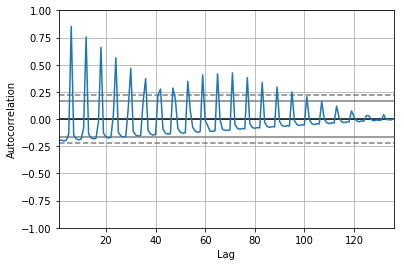

In [16]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(d1.dropna())

In [17]:
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(d1.dropna(), autolag='AIC') 

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -41.564313
p-value                          0.000000
#Lags Used                       4.000000
Number of Observations Used    131.000000
Critical Value (1%)             -3.481282
Critical Value (5%)             -2.883868
Critical Value (10%)            -2.578677
dtype: float64


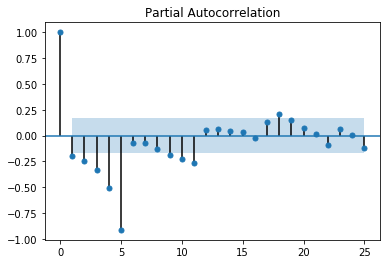

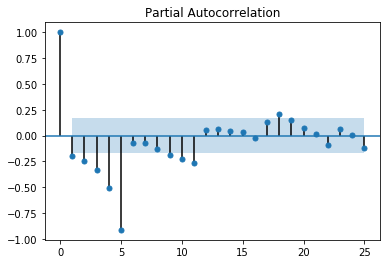

In [18]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(d1.dropna(),lags=25)

In [19]:
len(d1.dropna())

136

/home/shreyas/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/shreyas/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/shreyas/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1333: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/shreyas/anaconda3/lib/python3.6/site-packages/scipy/

                             ARIMA Model Results                              
Dep. Variable:                   D.M0   No. Observations:                  135
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -205.869
Method:                       css-mle   S.D. of innovations              1.069
Date:                Tue, 19 Feb 2019   AIC                            425.737
Time:                        17:31:36   BIC                            446.074
Sample:                             1   HQIC                           434.001
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0013      0.016      0.081      0.935      -0.030       0.032
ar.L1.D.M0    -1.0307      0.031    -32.780      0.000      -1.092      -0.969
ar.L2.D.M0    -1.0095      0.041    -24.695      0.0

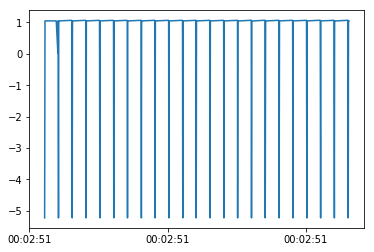

In [20]:
#AR
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(d1.dropna(),order=(5,1,0))
results_AR = model.fit()
plt.plot(d1)
print(results_AR.summary())

/home/shreyas/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/home/shreyas/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/home/shreyas/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


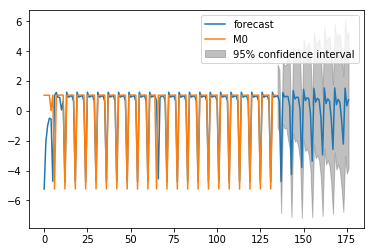

In [21]:
results_AR.plot_predict(1,177)
pr=results_AR.forecast(steps=40)

In [22]:
diff=[]
e=0
for i in range(0,40):
    diff.append(test[i]-pr[0][i])
    e+=abs(test[i]-pr[0][i])
e=e/40
e

2.0096435511130895

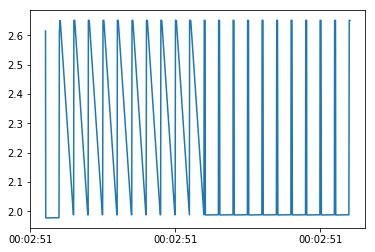

In [24]:
rm = d1.rolling(window=10).std()
plt.plot(rm)

In [185]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())
pr=results_AR.forecast(steps=1)

len(predictions_ARIMA_diff)
#predictions_ARIMA_diff[135]=pr[0]
#predictions_ARIMA_diff = predictions_ARIMA_diff + train.shift(1)
#predictions_ARIMA_diff.head()

Epoch_Time_of_Clock
2017-11-01 18:00:00    0.001284
2017-11-01 20:00:00   -3.090664
2017-11-01 22:00:00   -2.041656
2017-11-02 00:00:00   -1.542442
2017-11-02 12:00:00   -1.598997
dtype: float64


135

In [148]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Epoch_Time_of_Clock
2017-11-01 16:00:00   -0.001841
2017-11-01 18:00:00    4.200918
2017-11-01 20:00:00    2.481593
2017-11-01 22:00:00    1.239731
2017-11-02 00:00:00    0.287675
dtype: float64


In [151]:
predictions_ARIMA_log = pd.Series(train.ix[0], index=train.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Epoch_Time_of_Clock
2017-11-01 14:00:00    2.755637
2017-11-01 16:00:00    2.753795
2017-11-01 18:00:00    6.956554
2017-11-01 20:00:00    5.237229
2017-11-01 22:00:00    3.995367
dtype: float64

In [26]:

from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=622.905, BIC=628.730, Fit time=0.031 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=619.176, BIC=627.914, Fit time=0.054 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=558.612, BIC=567.350, Fit time=0.192 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.306 seconds


ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 1, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend=None,
   with_intercept=True)

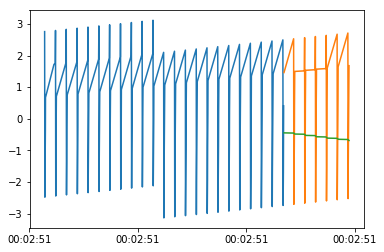

In [27]:
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()